In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


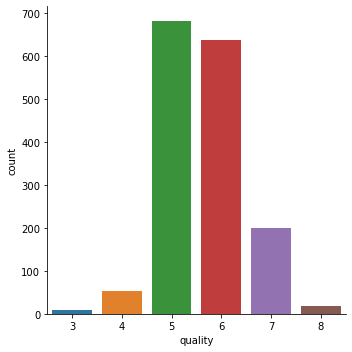

In [8]:
#number of values for each quality
sns.catplot(x='quality',data = df, kind = 'count')

The wine quality starts from 3 and the highest wine quality is 8,number of values are greater for 5 & 6

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

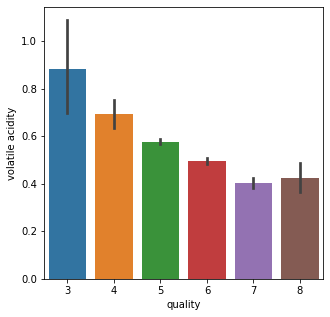

In [9]:
#volatile acidity vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data=df)

from above observations increased volatile acidity decreases the quality of wine

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

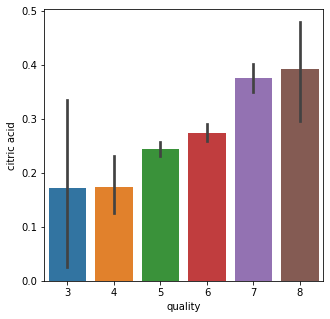

In [10]:
#citric acidity vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data=df)

Above observations tells that higher the citric acid level better the quality of wine

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

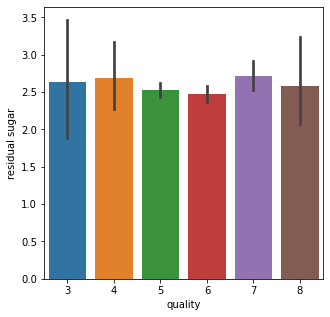

In [11]:
#residual sugar vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data=df)

residual sugar level is almost similer in every wine, there is no such difference in residual suger level

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

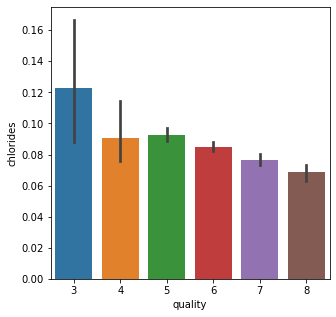

In [12]:
#chlorides vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data=df)

From above observations good quality wine has lower amount of chlorides

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

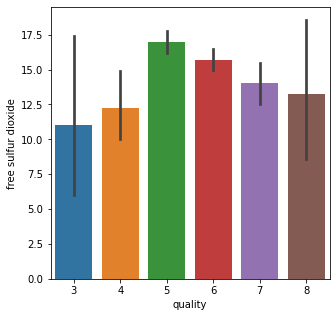

In [13]:
#free sulfur dioxide vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

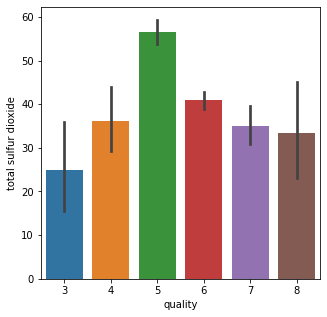

In [14]:
#Total sulfur dioxide vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

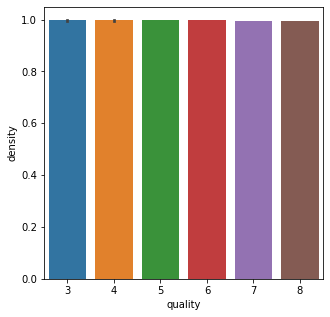

In [15]:
#density vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'density', data=df)

all types of wine has equal density level 

<AxesSubplot:xlabel='quality', ylabel='pH'>

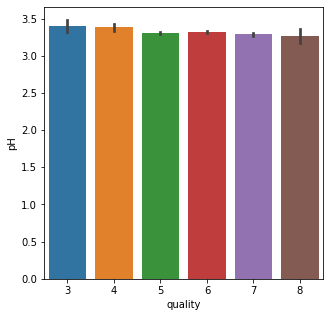

In [93]:
#pH vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

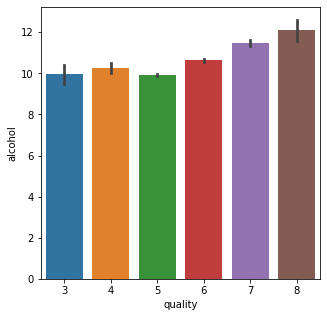

In [94]:
#alcohol vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data=df)

Higher the alcohol level higher the quality of wine

Correlation

<AxesSubplot:>

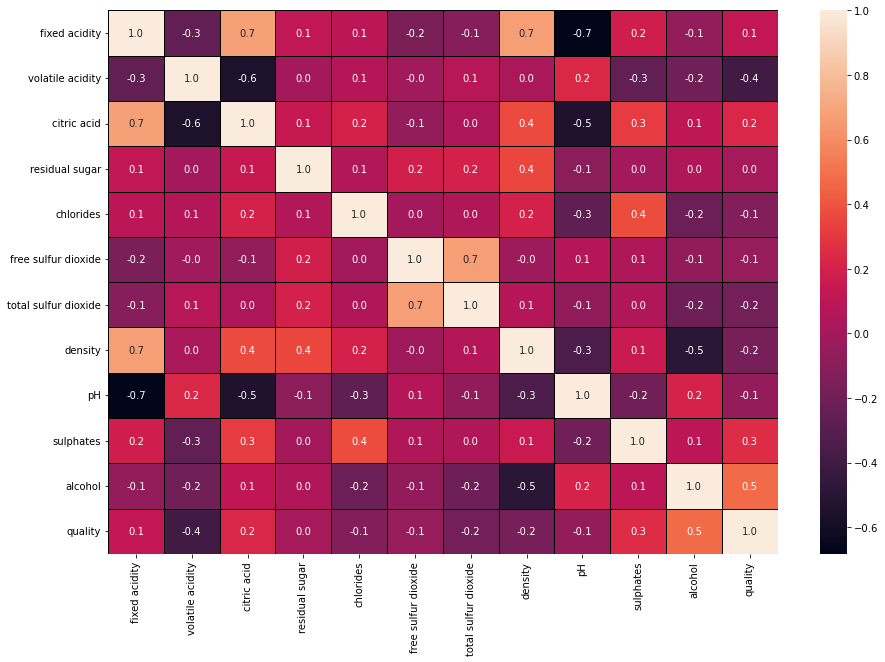

In [17]:

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cbar=True, linewidths=0.5,linecolor="black", fmt='.1f')
       

In [18]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

separating the data

In [19]:
X = df.drop('quality',axis=1)


In [20]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [21]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [22]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [24]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Training model

Random Forest Classifier

In [25]:
model = RandomForestClassifier()

In [26]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [27]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9375


Build Predictive System

In [29]:
data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5) #Enter the values of diff parameter here
#changing the input data to a nupmy array
data_as_numpy_array = np.asarray(data)

#reshape data 

reshaped_data = data_as_numpy_array.reshape(1,-1)

prediction = model.predict(reshaped_data)
print(prediction)

if (prediction[0]--1):
     print('Good Quality Wine')
else:
    print('Bad Quality Wine') 



[1]
Good Quality Wine


Quality >=7 given by 1 denotes good quality wine and viceverca
